# STAT 481 Association
# Ali Sameer Ali Alzenji 202107857
# Ebrahim Juma Alsawan 202009241

### install and import libraries

In [3]:
### install library 
!pip install mlxtend
!pip install openpyxl
### import library for apriori, association_rules, and TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### load the data

In [5]:
df =pd.read_csv("Transaction_Data_2.csv")
df.head()

ID                                            Product  Quantity  \
0  576372909       Quanta Mini Peanut Ice Cream Stick 6 x 50 ml         1   
1  576372909       Quanta Mini Almond Ice Cream Stick 6 x 50 ml         1   
2  576372909           Belvita Bran Biscuit Value Pack 8 x 56 g         1   
3  576372909         Jannaty Sabah Date Bar Value Pack 8 x 44 g         2   
4  576372909  Dettol Original Anti Bacterial Soap Value Pack...         1   

   Price (BHD)       Category  
0        0.825      Ice Cream  
1        0.825      Ice Cream  
2        1.690         Snacks  
3        0.490         Snacks  
4        1.290  Personal Care

In [6]:
### explore the data frame
df.shape

(216, 5)

In [7]:
### drop null values (if any)
df.dropna(subset=["ID","Product"],inplace=True)
### shape is unchanged, dataset have no null values
df.shape

(216, 5)

### Create List of Transactions And Convert All Items to Strings
### we used both the Product and the Category

### product

In [10]:
### group products by ID into transaction lists and convert all items to strings
transactions_Product = df.groupby("ID")["Product"].apply(list).values.tolist()
transactions_Product = [[str(item) for item in tran] for tran in transactions_Product]
### show first 4 transactions
print(transactions_Product[:4])

[['Purina Felix As Good As It Looks Delicious Favorite Selections In Jelly Cat Food (Chicken Beef & Salmon) 12 x 85 g', 'Purina Friskies Indoor Delights Dry Cat Food 1 kg', 'Friskies Prime Fillets Chicken Gravy 156 g', 'Friskies Price Fillets Turkey Dinner 156 g', 'Purina Friskies Shreds with Ocean Whitefish & Tuna in Sauce 156 g', 'Lusine Sliced Brown Bread 1 pkt', 'Almarai Fresh Yoghurt Full Cream 6 x 170 g', 'Almarai Fresh Milk Full Fat 2.85 Litre', 'Belvita Bran Biscuit Value Pack 8 x 56 g 2 pkts', 'Lusine cheese Puff 70 g 5+1 Free', 'Almarai Cheddar Cheese Slices 4 x 200 g', 'Rainbow Milk Powder 900 g', 'LuLu Green Tea 100 Teabags', 'SIS Raw Sugar 1 kg', 'Puck Cream Cheese Squares 24 Portions 432 g', 'Nyssa Spreadable Processed Cream Cheese 3 x 240 g', 'Almarai 100% Orange Juice No Added Sugar 1.4 Litres', 'KDD Pineapple Juice 1 Litre', 'KDD Pineapple Juice 6 x 180ml'], ['Goody Peanut Butter Creamy 510 g', 'Lusine Sliced Brown Bread 1 pkt', 'Almarai Fresh Yoghurt Full Cream 6 x 17

### for category

In [12]:
### group categories by ID into transaction lists and convert all items to strings
transactions_Category = df.groupby("ID")["Category"].apply(list).values.tolist()
transactions_Category = [[str(item) for item in tran] for tran in transactions_Category]
### show first 4 transactions
print(transactions_Category[:4])

[['Pet Food', 'Pet Food', 'Pet Food', 'Pet Food', 'Pet Food', 'Bakery', 'Dairy', 'Dairy', 'Snacks', 'Snacks', 'Dairy', 'Dairy', 'Beverages', 'Sugar', 'Dairy', 'Dairy', 'Juice', 'Juice', 'Juice'], ['Condiment', 'Bakery', 'Dairy', 'Personal Care', 'Snacks', 'Nuts & Dried Fruits', 'Nuts & Dried Fruits', 'Nuts & Dried Fruits', 'Pet Food', 'Pet Food', 'Pet Food', 'Pet Food', 'Pet Food', 'Household Products', 'Bakery', 'Household Products', 'Beverages', 'Dairy', 'Dairy', 'Juice', 'Juice', 'Juice', 'Dairy', 'Dairy', 'Dairy', 'Dairy', 'Sugar', 'Dairy', 'Dairy', 'Dairy', 'Household Products', 'Personal Care', 'Baking Ingredients', 'Bakery', 'Seasonings & Spices'], ['Condiment', 'Bakery', 'Bakery', 'Snacks', 'Dairy', 'Dairy', 'Juice', 'Juice', 'Dairy', 'Dairy', 'Dairy', 'Personal Care', 'Snacks'], ['Pet Food', 'Pet Food', 'Dairy', 'Bakery', 'Frozen Food', 'Frozen Food', 'Juice', 'Juice', 'Juice', 'Dairy', 'Cleaning Products', 'Fruits & Vegetables', 'Fruits & Vegetables', 'Fruits & Vegetables', '

### Encode Into a Binary Matrix

### for product

In [15]:
### use the TransactionEncoder for product transactions
te_Product= TransactionEncoder()
### fit and transform the product transactions into a binary matrix and show the first few rows
te_ary_Product = te_Product.fit(transactions_Product).transform(transactions_Product)
df_encoded_Product = pd.DataFrame(te_ary_Product,columns=te_Product.columns_)
print(df_encoded_Product.head())

   Al Kabeer French Fries 2.5 kg  Al Kabeer Sweet Corn 3 x 400 g  \
0                          False                           False   
1                          False                           False   
2                          False                           False   
3                           True                            True   
4                           True                            True   

   Al Safi Turkish Style Full Fat Premium Labneh Value Pack 3 x 180 g  \
0                                              False                    
1                                               True                    
2                                              False                    
3                                              False                    
4                                              False                    

   Al-Kbous Black Tea 100 Teabags  \
0                           False   
1                            True   
2                           False   
3   

### for category

In [17]:
### we will repeat the same process but this time for the category
te_Category= TransactionEncoder()
te_ary_Category = te_Category.fit(transactions_Category).transform(transactions_Category)
df_encoded_Category = pd.DataFrame(te_ary_Category,columns=te_Category.columns_)
print(df_encoded_Category.head())

   Bakery  Baking Ingredients  Beverages  Cleaning  Cleaning Products  \
0    True               False       True     False              False   
1    True                True       True     False              False   
2    True               False      False     False              False   
3    True               False      False     False               True   
4    True               False      False      True              False   

   Cleaning Supplies  Condiment  Condiments  Dairy  Frozen Food  ...  \
0              False      False       False   True        False  ...   
1              False       True       False   True        False  ...   
2              False       True       False   True        False  ...   
3              False       True       False   True         True  ...   
4              False       True       False   True         True  ...   

   Ice Cream  Juice  Nuts & Dried Fruits  Personal Care  Pet Food  Produce  \
0      False   True                False          

### Task 1: Identify Frequent Itemsets (for Product)

In [19]:
frequent_items_product1 = apriori(df_encoded_Product,min_support=0.4,use_colnames=True)
print(frequent_items_product1.shape)
print(frequent_items_product1.head())
### from 40% min_support we got over a million frequent itemsets, which is a large amount and as we know a rule that
### has very low support may occur simply by chance
### That is why we will increase the threshold to eliminate uninteresting rules as we will see in the next few cells
### also having a lower threshold takes too much time to compute

(4194591, 2)
   support                                           itemsets
0      0.4                    (Al Kabeer French Fries 2.5 kg)
1      0.4                   (Al Kabeer Sweet Corn 3 x 400 g)
2      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
3      0.4                  (Almarai Apple Drink 18 x 140 ml)
4      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)


In [20]:
frequent_items_product2 = apriori(df_encoded_Product,min_support=0.5,use_colnames=True)
print(frequent_items_product2.shape)
print(frequent_items_product2.head())
### from 50% min_support we got the number down from 4 million to less than 800

(783, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      0.5                       (Almarai Cream Cheese 432 g)
3      0.7                        (Almarai Fresh Cream 100 g)
4      0.9           (Almarai Fresh Milk Full Fat 2.85 Litre)


In [21]:
frequent_items_product3 = apriori(df_encoded_Product,min_support=0.6,use_colnames=True)
print(frequent_items_product3.shape)
print(frequent_items_product3.head())
### from 60% min_support we got the number down from 783 to 239

(239, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      0.7                        (Almarai Fresh Cream 100 g)
3      0.9           (Almarai Fresh Milk Full Fat 2.85 Litre)
4      1.0       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)


In [22]:
frequent_items_product4 = apriori(df_encoded_Product,min_support=0.7,use_colnames=True)
print(frequent_items_product4.shape)
print(frequent_items_product4.head())
### from 70% min_support we got the number down from 239 to 127

(127, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      0.7                        (Almarai Fresh Cream 100 g)
3      0.9           (Almarai Fresh Milk Full Fat 2.85 Litre)
4      1.0       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)


In [23]:
frequent_items_product5 = apriori(df_encoded_Product,min_support=0.8,use_colnames=True)
print(frequent_items_product5.shape)
print(frequent_items_product5.head())
### from 80% min_support we got the number down from 127 to 47
### now only the common itemsets those in at least 80% of transactions are appearing

(47, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      0.9           (Almarai Fresh Milk Full Fat 2.85 Litre)
3      1.0       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)
4      0.8  (Almarai Mixed Fruit Orange Carrot Juice No Ad...


In [24]:
frequent_items_product6 = apriori(df_encoded_Product,min_support=0.9,use_colnames=True)
print(frequent_items_product6.shape)
print(frequent_items_product6.head())
### from 90% min_support we got the number down from 47 to 31
### now only the most consistently purchased items those in at least 90% of transactions are appearing

(31, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      0.9           (Almarai Fresh Milk Full Fat 2.85 Litre)
3      1.0       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)
4      1.0                  (Lusine Sliced Brown Bread 1 pkt)


In [25]:
frequent_items_product7 = apriori(df_encoded_Product,min_support=1.0,use_colnames=True)
print(frequent_items_product7.shape)
print(frequent_items_product7.head())
### from 100% min_support we got the number down from 31 to 15
### these are the items that are always present in all transactions

(15, 2)
   support                                           itemsets
0      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...
1      1.0          (Almarai Cheddar Cheese Slices 4 x 200 g)
2      1.0       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)
3      1.0                  (Lusine Sliced Brown Bread 1 pkt)
4      1.0  (Almarai 100% Orange Juice No Added Sugar 1.4 ...


### Task 1: Identify Frequent Itemsets (for Category)

In [27]:
### we will repate the same steps but this time for the category
frequent_items_category1 = apriori(df_encoded_Category,min_support=0.4,use_colnames=True)
print(frequent_items_category1.shape)
print(frequent_items_category1.head())

(151, 2)
   support       itemsets
0      1.0       (Bakery)
1      0.6    (Condiment)
2      1.0        (Dairy)
3      0.4  (Frozen Food)
4      1.0        (Juice)


In [28]:
frequent_items_category2 = apriori(df_encoded_Category,min_support=0.5,use_colnames=True)
print(frequent_items_category2.shape)
print(frequent_items_category2.head())

(79, 2)
   support         itemsets
0      1.0         (Bakery)
1      0.6      (Condiment)
2      1.0          (Dairy)
3      1.0          (Juice)
4      0.9  (Personal Care)


In [29]:
frequent_items_category3 = apriori(df_encoded_Category,min_support=0.6,use_colnames=True)
print(frequent_items_category3.shape)
print(frequent_items_category3.head())

(55, 2)
   support         itemsets
0      1.0         (Bakery)
1      0.6      (Condiment)
2      1.0          (Dairy)
3      1.0          (Juice)
4      0.9  (Personal Care)


In [30]:
frequent_items_category4 = apriori(df_encoded_Category,min_support=0.7,use_colnames=True)
print(frequent_items_category4.shape)
print(frequent_items_category4.head())

(31, 2)
   support         itemsets
0      1.0         (Bakery)
1      1.0          (Dairy)
2      1.0          (Juice)
3      0.9  (Personal Care)
4      0.8       (Pet Food)


In [31]:
frequent_items_category5= apriori(df_encoded_Category,min_support=0.8,use_colnames=True)
print(frequent_items_category5.shape)
print(frequent_items_category5.head())

(23, 2)
   support         itemsets
0      1.0         (Bakery)
1      1.0          (Dairy)
2      1.0          (Juice)
3      0.9  (Personal Care)
4      0.8       (Pet Food)


In [32]:
frequent_items_category6= apriori(df_encoded_Category,min_support=0.9,use_colnames=True)
print(frequent_items_category6.shape)
print(frequent_items_category6.head())

(15, 2)
   support         itemsets
0      1.0         (Bakery)
1      1.0          (Dairy)
2      1.0          (Juice)
3      0.9  (Personal Care)
4      1.0  (Bakery, Dairy)


In [33]:
frequent_items_category7= apriori(df_encoded_Category,min_support=1.0,use_colnames=True)
print(frequent_items_category7.shape)
print(frequent_items_category7.head())

(7, 2)
   support         itemsets
0      1.0         (Bakery)
1      1.0          (Dairy)
2      1.0          (Juice)
3      1.0  (Bakery, Dairy)
4      1.0  (Bakery, Juice)


### task 2: Generate association rules (for Product)

In [35]:
### frequent_items_Product2 has a min_support=0.5
rules_product1 = association_rules(
    frequent_items_product2,metric="confidence",min_threshold=0.9
)
rules_product1 = rules_product1.sort_values("confidence" , ascending=False)
rules_product1[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0     (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
7528  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
7552  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
7553  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
7554  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   

                                            consequents  support  confidence  \
0             (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
7528          (Almarai Cheddar Cheese Slices 4 x 200 g)      0.5         1.0   
7552  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, K...      0.5         1.0   
7553  (Almarai Fresh Cream 100 g, Lusine Sliced Brow...      0.5         1.0   
7554  (KDD Pineapple Juice 1 Litre, Lusine Sliced Br...      0.5         1.0   

          lift  
0     1.000000  
7528  1.000000  
7552  1.666667  
7553  1.428571  
7554  1.428571

In [36]:
### frequent_items_Product3 has a min_support=0.6
rules_product2 = association_rules(
    frequent_items_product3,metric="confidence",min_threshold=0.9
)
rules_product2 = rules_product2.sort_values("confidence" , ascending=False)
rules_product2[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0    (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
785  (Friskies Prime Fillets Chicken Gravy 156 g, L...   
801  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, K...   
800  (KDD Pineapple Juice 1 Litre, Lusine Sliced Br...   
799  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   

                                           consequents  support  confidence  \
0            (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
785  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      0.6         1.0   
801  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      0.7         1.0   
800  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      0.7         1.0   
799  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...      0.7         1.0   

     lift  
0     1.0  
785   1.0  
801   1.0  
800   1.0  
799   1.0

In [37]:
### frequent_items_Product4 has a min_support=0.7
rules_product3 = association_rules(
    frequent_items_product4,metric="confidence",min_threshold=0.9
)
rules_product3 = rules_product3.sort_values("confidence" , ascending=False)
rules_product3[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0    (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
431  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
424  (Lusine Cheese Puff 70 g 5+1 Free, Lusine Slic...   
425  (Lusine Cheese Puff 70 g 5+1 Free, Almarai Fre...   
426                 (Lusine Cheese Puff 70 g 5+1 Free)   

                                           consequents  support  confidence  \
0            (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
431  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, A...      0.7         1.0   
424  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, A...      0.7         1.0   
425  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...      0.7         1.0   
426  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...      0.7         1.0   

         lift  
0    1.000000  
431  1.000000  
424  1.111111  
425  1.000000  
426  1.111111

In [38]:
### frequent_items_Product5 has a min_support=0.8
rules_product4 = association_rules(
    frequent_items_product5,metric="confidence",min_threshold=0.9
)
rules_product4 = rules_product4.sort_values("confidence" , ascending=False)
rules_product4[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0    (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
152  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
142  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
143  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
144  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...   

                                           consequents  support  confidence  \
0            (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
152                  (Lusine Sliced Brown Bread 1 pkt)      0.8         1.0   
142  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, A...      1.0         1.0   
143  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...      1.0         1.0   
144  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      1.0         1.0   

     lift  
0     1.0  
152   1.0  
142   1.0  
143   1.0  
144   1.0

In [39]:
### frequent_items_Product6 has a min_support=0.9
rules_product5 = association_rules(
    frequent_items_product6,metric="confidence",min_threshold=0.9
)
rules_product5 = rules_product5.sort_values("confidence" , ascending=False)
rules_product5[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0   (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
82  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
97  (Lusine Sliced Brown Bread 1 pkt, Almarai Ched...   
96  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
95  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   

                                          consequents  support  confidence  \
0           (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
82       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)      0.9         1.0   
97  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      0.9         1.0   
96          (Almarai Cheddar Cheese Slices 4 x 200 g)      0.9         1.0   
95                  (Lusine Sliced Brown Bread 1 pkt)      0.9         1.0   

    lift  
0    1.0  
82   1.0  
97   1.0  
96   1.0  
95   1.0

In [40]:
### frequent_items_Product7 has a min_support=1.0
rules_product6 = association_rules(
    frequent_items_product7,metric="confidence",min_threshold=0.9
)
rules_product6 = rules_product6.sort_values("confidence" , ascending=False)
rules_product6[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents  \
0   (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
37  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
27  (Almarai 100% Orange Juice No Added Sugar 1.4 ...   
28       (Almarai Fresh Yoghurt Full Cream 6 x 170 g)   
29                  (Lusine Sliced Brown Bread 1 pkt)   

                                          consequents  support  confidence  \
0           (Almarai Cheddar Cheese Slices 4 x 200 g)      1.0         1.0   
37                  (Lusine Sliced Brown Bread 1 pkt)      1.0         1.0   
27  (Almarai Fresh Yoghurt Full Cream 6 x 170 g, L...      1.0         1.0   
28  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      1.0         1.0   
29  (Almarai 100% Orange Juice No Added Sugar 1.4 ...      1.0         1.0   

    lift  
0    1.0  
37   1.0  
27   1.0  
28   1.0  
29   1.0

### task 2: Generate association rules (for Category)

In [42]:
### frequent_items_Category1 has a min_support=0.4
rules_category1 = association_rules(
    frequent_items_category1,metric="confidence",min_threshold=0.9
)
rules_category1 = rules_category1.sort_values("confidence",ascending=False)
rules_category1[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents                   consequents  \
0                               (Condiment)                      (Bakery)   
631  (Frozen Food, Personal Care, Pet Food)            (Condiment, Dairy)   
619                    (Juice, Frozen Food)  (Pet Food, Condiment, Dairy)   
620                (Frozen Food, Condiment)      (Juice, Dairy, Pet Food)   
621                 (Frozen Food, Pet Food)     (Juice, Condiment, Dairy)   

     support  confidence      lift  
0        0.6         1.0  1.000000  
631      0.4         1.0  1.666667  
619      0.4         1.0  2.000000  
620      0.4         1.0  1.250000  
621      0.4         1.0  1.666667

In [43]:
### frequent_items_Category2 has a min_support=0.5
rules_category2 = association_rules(
    frequent_items_category2,metric="confidence",min_threshold=0.9
)
rules_category2 = rules_category2.sort_values("confidence",ascending=False)
rules_category2[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents             consequents  support  \
0                          (Condiment)                (Bakery)      0.6   
177              (Pet Food, Condiment)  (Juice, Personal Care)      0.5   
164  (Condiment, Dairy, Personal Care)                 (Juice)      0.6   
165                 (Juice, Condiment)  (Dairy, Personal Care)      0.6   
166                 (Condiment, Dairy)  (Juice, Personal Care)      0.6   

     confidence      lift  
0           1.0  1.000000  
177         1.0  1.111111  
164         1.0  1.000000  
165         1.0  1.111111  
166         1.0  1.111111

In [44]:
### frequent_items_Category3 has a min_support=0.6
rules_category3 = association_rules(
    frequent_items_category3,metric="confidence",min_threshold=0.9
)
rules_category3 = rules_category3.sort_values("confidence",ascending=False)
rules_category3[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents      consequents  support  confidence  \
0                       (Condiment)         (Bakery)      0.6         1.0   
104      (Condiment, Personal Care)  (Bakery, Juice)      0.6         1.0   
107  (Bakery, Juice, Personal Care)          (Dairy)      0.9         1.0   
108  (Bakery, Dairy, Personal Care)          (Juice)      0.9         1.0   
109   (Juice, Dairy, Personal Care)         (Bakery)      0.9         1.0   

     lift  
0     1.0  
104   1.0  
107   1.0  
108   1.0  
109   1.0

In [45]:
### frequent_items_Category4 has a min_support=0.7
rules_category4 = association_rules(
    frequent_items_category4,metric="confidence",min_threshold=0.9
)
rules_category4 = rules_category4.sort_values("confidence",ascending=False)
rules_category4[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents             consequents  support  \
0                         (Bakery)                 (Dairy)      1.0   
53  (Bakery, Dairy, Personal Care)                 (Juice)      0.9   
66       (Bakery, Pet Food, Dairy)                 (Juice)      0.8   
65       (Bakery, Juice, Pet Food)                 (Dairy)      0.8   
64                 (Personal Care)  (Bakery, Juice, Dairy)      0.9   

    confidence  lift  
0          1.0   1.0  
53         1.0   1.0  
66         1.0   1.0  
65         1.0   1.0  
64         1.0   1.0

In [46]:
### frequent_items_Category5 has a min_support=0.8
rules_category5 = association_rules(
    frequent_items_category5,metric="confidence",min_threshold=0.9
)
rules_category5 = rules_category5.sort_values("confidence",ascending=False)
rules_category5[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents      consequents  support  confidence  lift
0                 (Bakery)          (Dairy)      1.0         1.0   1.0
29              (Pet Food)  (Bakery, Dairy)      0.8         1.0   1.0
32  (Juice, Personal Care)         (Bakery)      0.9         1.0   1.0
1                  (Dairy)         (Bakery)      1.0         1.0   1.0
35         (Personal Care)  (Bakery, Juice)      0.9         1.0   1.0

In [47]:
### frequent_items_Category6 has a min_support=0.9
rules_category6 = association_rules(
    frequent_items_category6,metric="confidence",min_threshold=0.9
)
rules_category6 = rules_category6.sort_values("confidence",ascending=False)
rules_category6[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents      consequents  support  confidence  lift
0                 (Bakery)          (Dairy)      1.0         1.0   1.0
32  (Dairy, Personal Care)          (Juice)      0.9         1.0   1.0
20  (Dairy, Personal Care)         (Bakery)      0.9         1.0   1.0
23         (Personal Care)  (Bakery, Dairy)      0.9         1.0   1.0
1                  (Dairy)         (Bakery)      1.0         1.0   1.0

In [48]:
### frequent_items_Category7 has a min_support=1.0
rules_category7 = association_rules(
    frequent_items_category7,metric="confidence",min_threshold=0.9
)
rules_category7 = rules_category7.sort_values("confidence",ascending=False)
rules_category7[["antecedents" , "consequents" , "support" , "confidence" , "lift"]].head()
### the red text on the bottom is not an error it is warning,that there are some values
### are dividing by zero (0/0) or it is trying to divied by zero somewhere and the results will show as Nan
### we do not need to fix it as it does not affect the results

C:\Users\Ebrah\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents consequents  support  confidence  lift
0    (Bakery)     (Dairy)      1.0         1.0   1.0
1     (Dairy)    (Bakery)      1.0         1.0   1.0
2    (Bakery)     (Juice)      1.0         1.0   1.0
3     (Juice)    (Bakery)      1.0         1.0   1.0
4     (Juice)     (Dairy)      1.0         1.0   1.0

### Bounce And Further Work:

### Heatmap for the correlation between categories

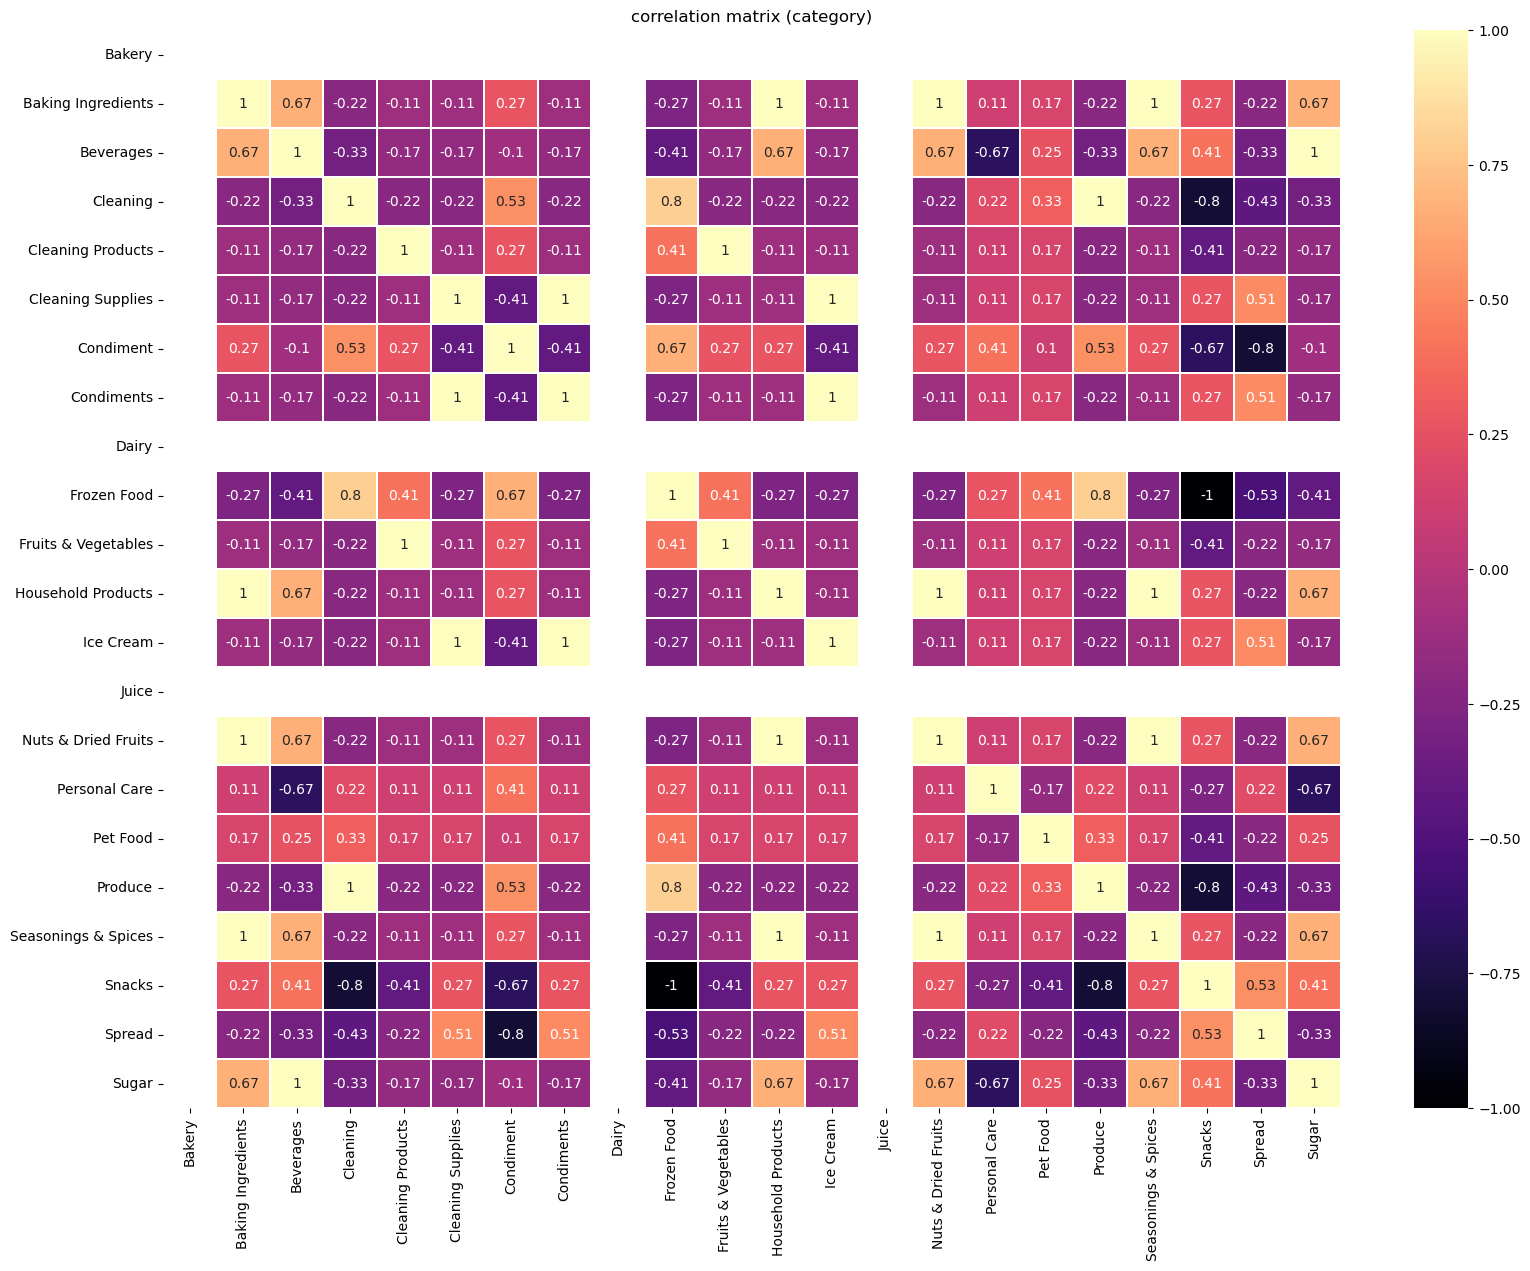

In [51]:
## the correlation matrix was used to investigate possibale patterns or groupings between product categories rather to measure actual item similarity
## we wanted to know for example if certain categories frequently appear together in many transactions
## such as "snacks" and "beverages" which could lead to a common buying pattern like "movie night" or "picnic"
import matplotlib.pyplot as plt
import seaborn as sns
CM = df_encoded_Category.corr()
plt.figure(figsize=(19,14))
sns.heatmap(CM,annot=True,cmap="magma",linewidths=0.1)
plt.title("correlation matrix (category)")
plt.show()
### the color white for some item is because the item is present in all the transactions
### if we go to the next cell we can see that for example "bakery" is true for all transactions
### this falles under the zero variance problem where a dataset or a variable shows no variability or fluctuation

In [52]:
### as we can see the three category Bakery,Juice, and Dairy appear in all transactions
print(df_encoded_Category["Bakery"])
print(df_encoded_Category["Juice"])
print(df_encoded_Category["Dairy"])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Bakery, dtype: bool
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Juice, dtype: bool
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Dairy, dtype: bool


### Heatmap for the correlation between Product

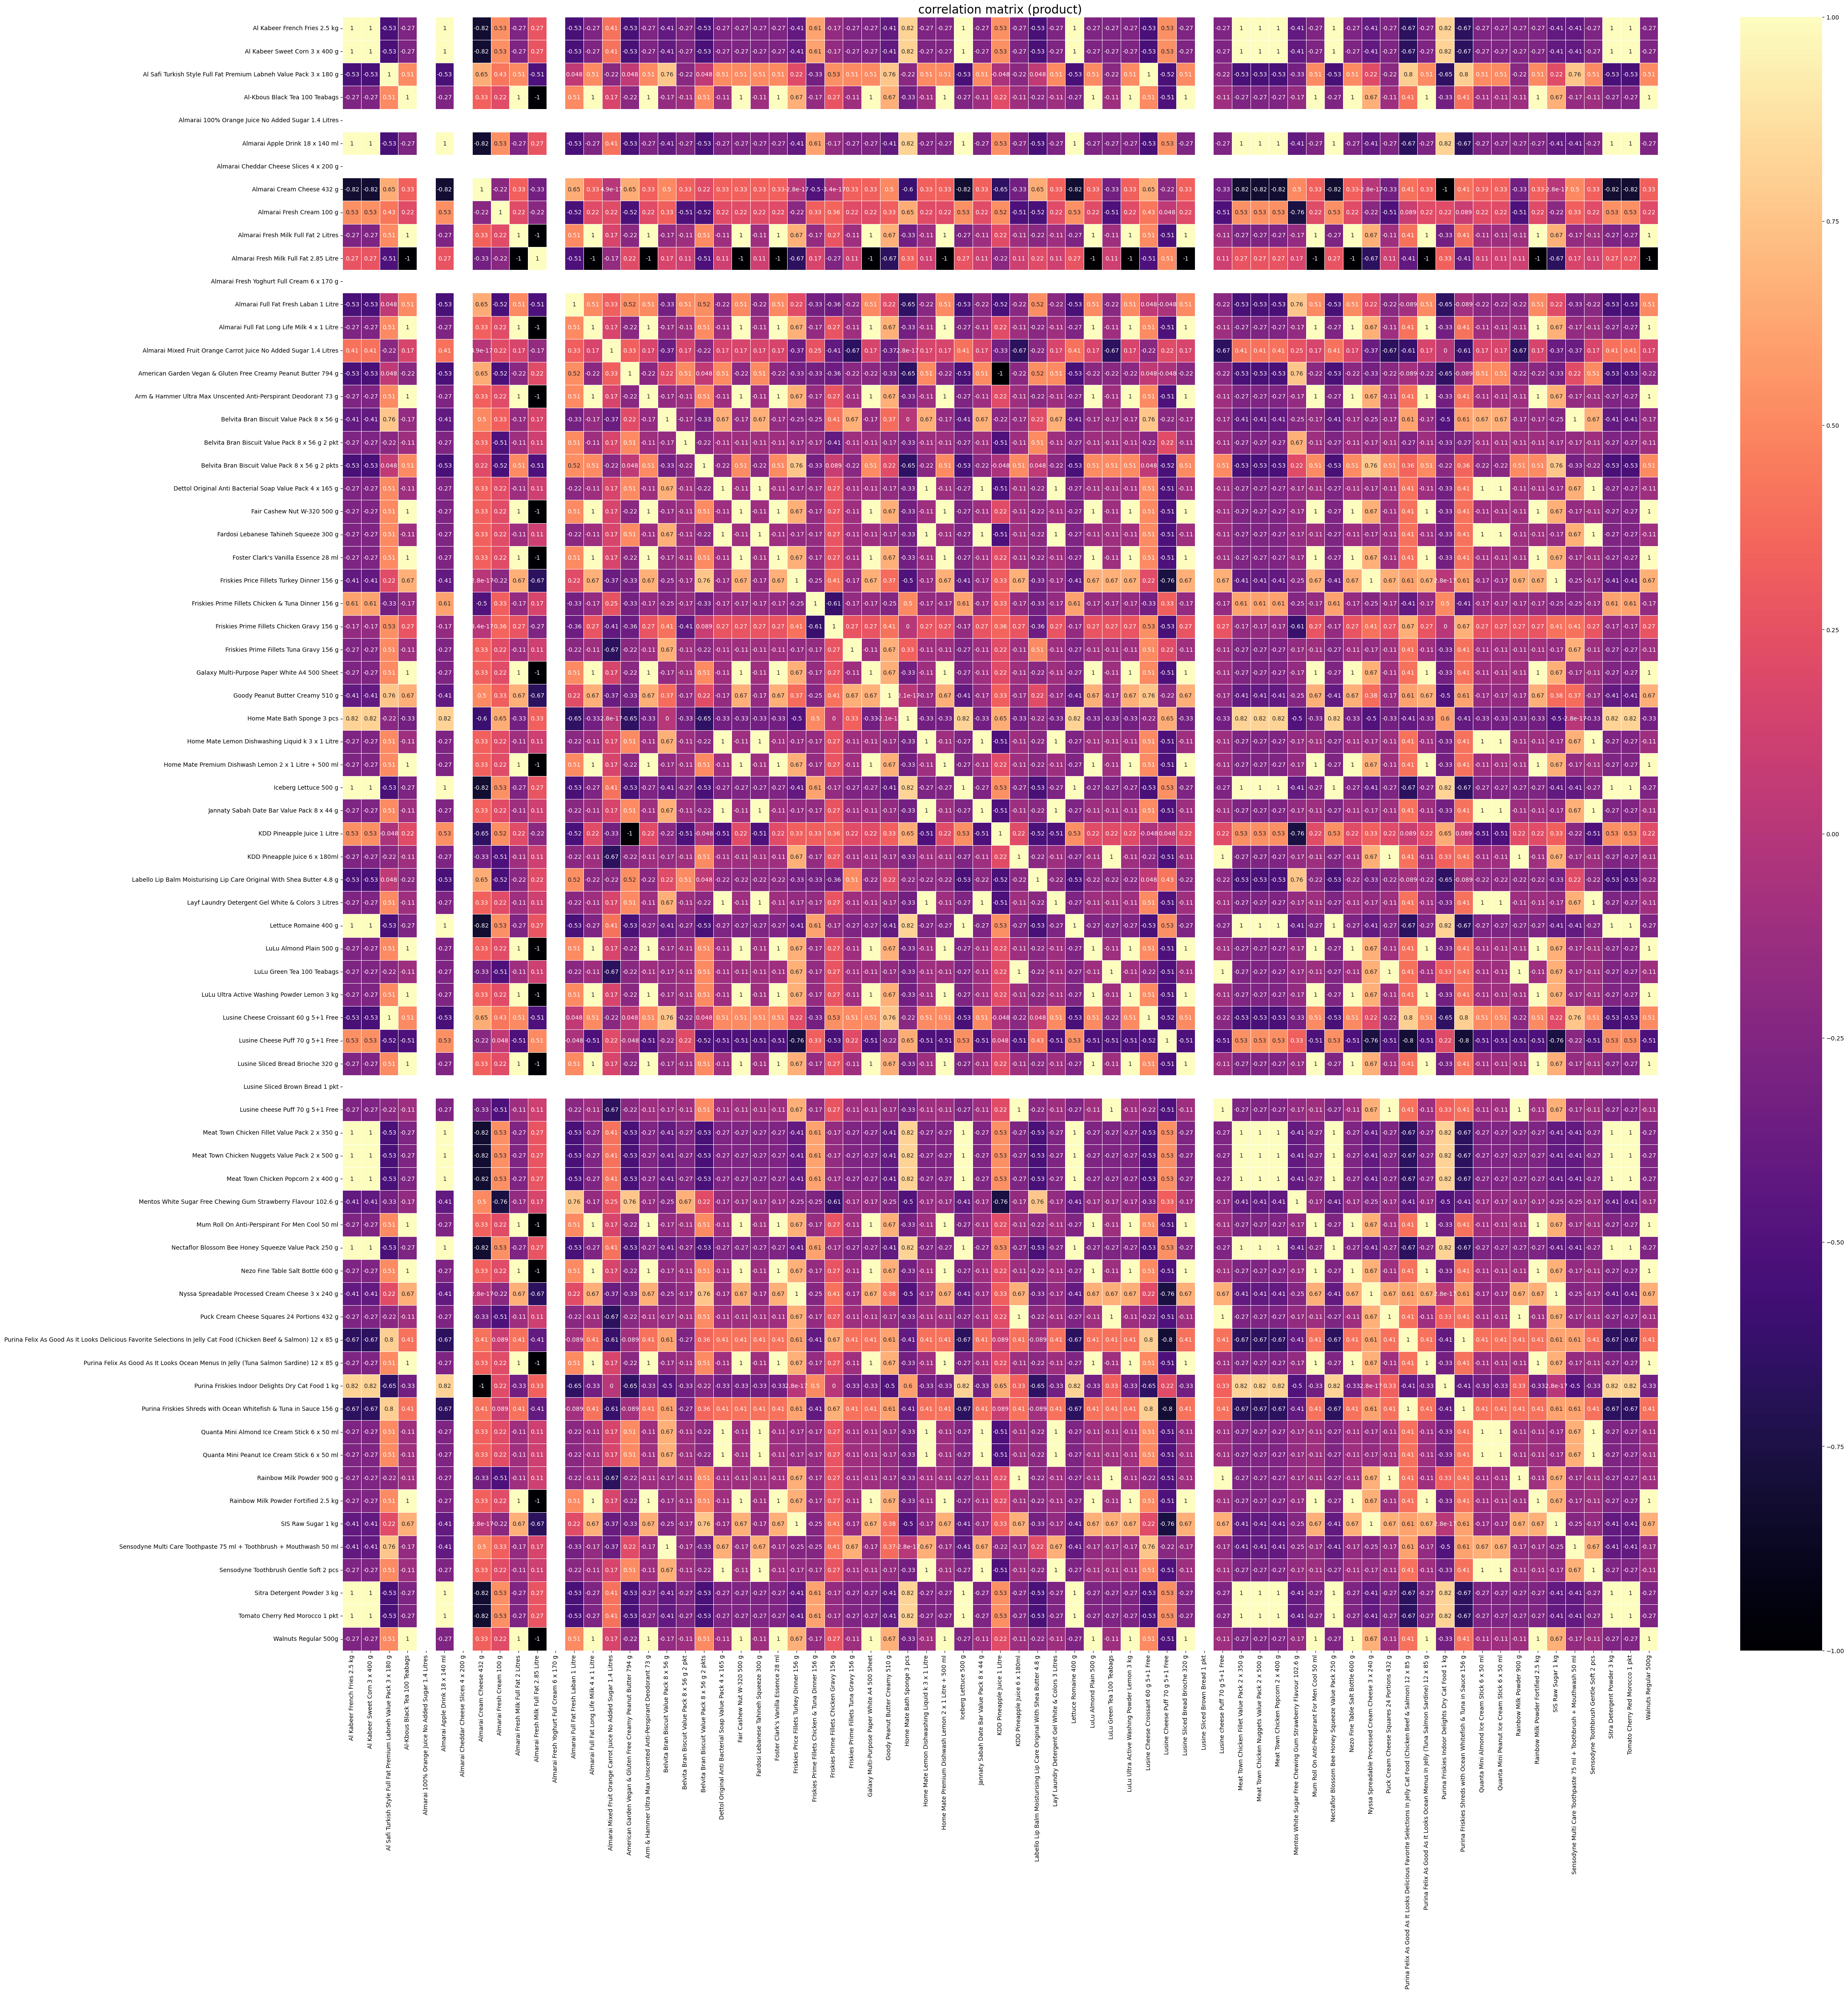

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
CP = df_encoded_Product.corr()
plt.figure(figsize=(50,50))
sns.heatmap(CP,annot=True,cmap="magma",linewidths=0.5,annot_kws={"size":10})
plt.title("correlation matrix (product)" ,fontsize=20)
### we saved the heatmap as a png to explaore the correlation better
plt.savefig("correlation_matrix_71x71.png",dpi=300,bbox_inches="tight")
plt.show()
### as we can see using the category for the heatmap gives a clear overview
### which is helpful for bussiness decision like product grouping
### however it hides specific correlation between individual products
### which could be important for cross selling or recommendation systems

### Heatmap for the Jaccard Similarity Matrix (Category)

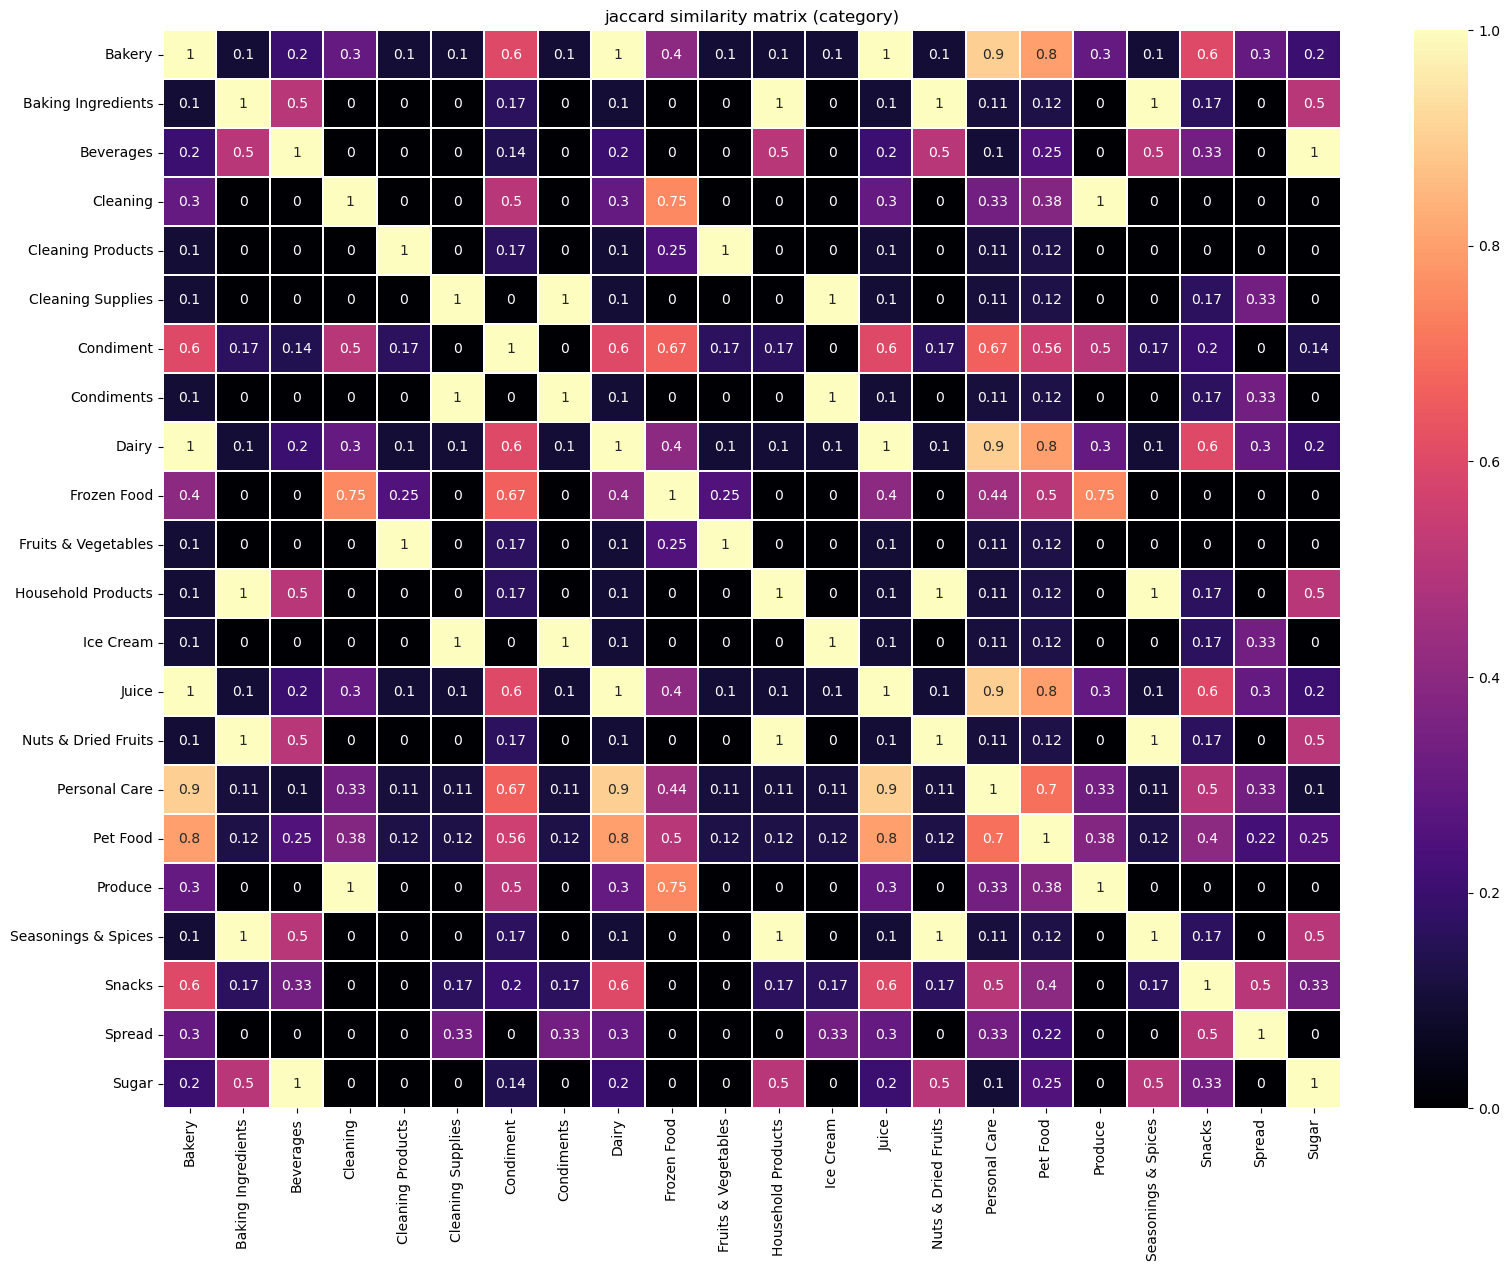

In [56]:
### now we want to measure the Jaccard similarity between product categories to identify co purchase behavior
### this method helps us understand which products or categories are frequently bought together
### for example if a customers who purchase "Bread" frequently also purchase "Butter" then the Jaccard similarity between these two
### categories will be high suggesting that they are frequently bought together
### this method is helpful for product bundling cross selling or recommendation systems.
from sklearn.metrics import jaccard_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# we used a method called Nested List Comprehension
# the resource for this is in this link
# https://www.geeksforgeeks.org/nested-list-comprehensions-in-python/
JMC = pd.DataFrame(
    [[jaccard_score(df_encoded_Category[col1],df_encoded_Category[col2]) for col2 in df_encoded_Category.columns] #list Comprehension
     for col1 in df_encoded_Category.columns],
    index=df_encoded_Category.columns,
    columns=df_encoded_Category.columns
)
plt.figure(figsize=(19,14))
sns.heatmap(JMC,annot=True,cmap="magma",linewidths=0.1)
plt.title("jaccard similarity matrix (category)")
plt.show()

### Heatmap for the Jaccard Similarity Matrix Product

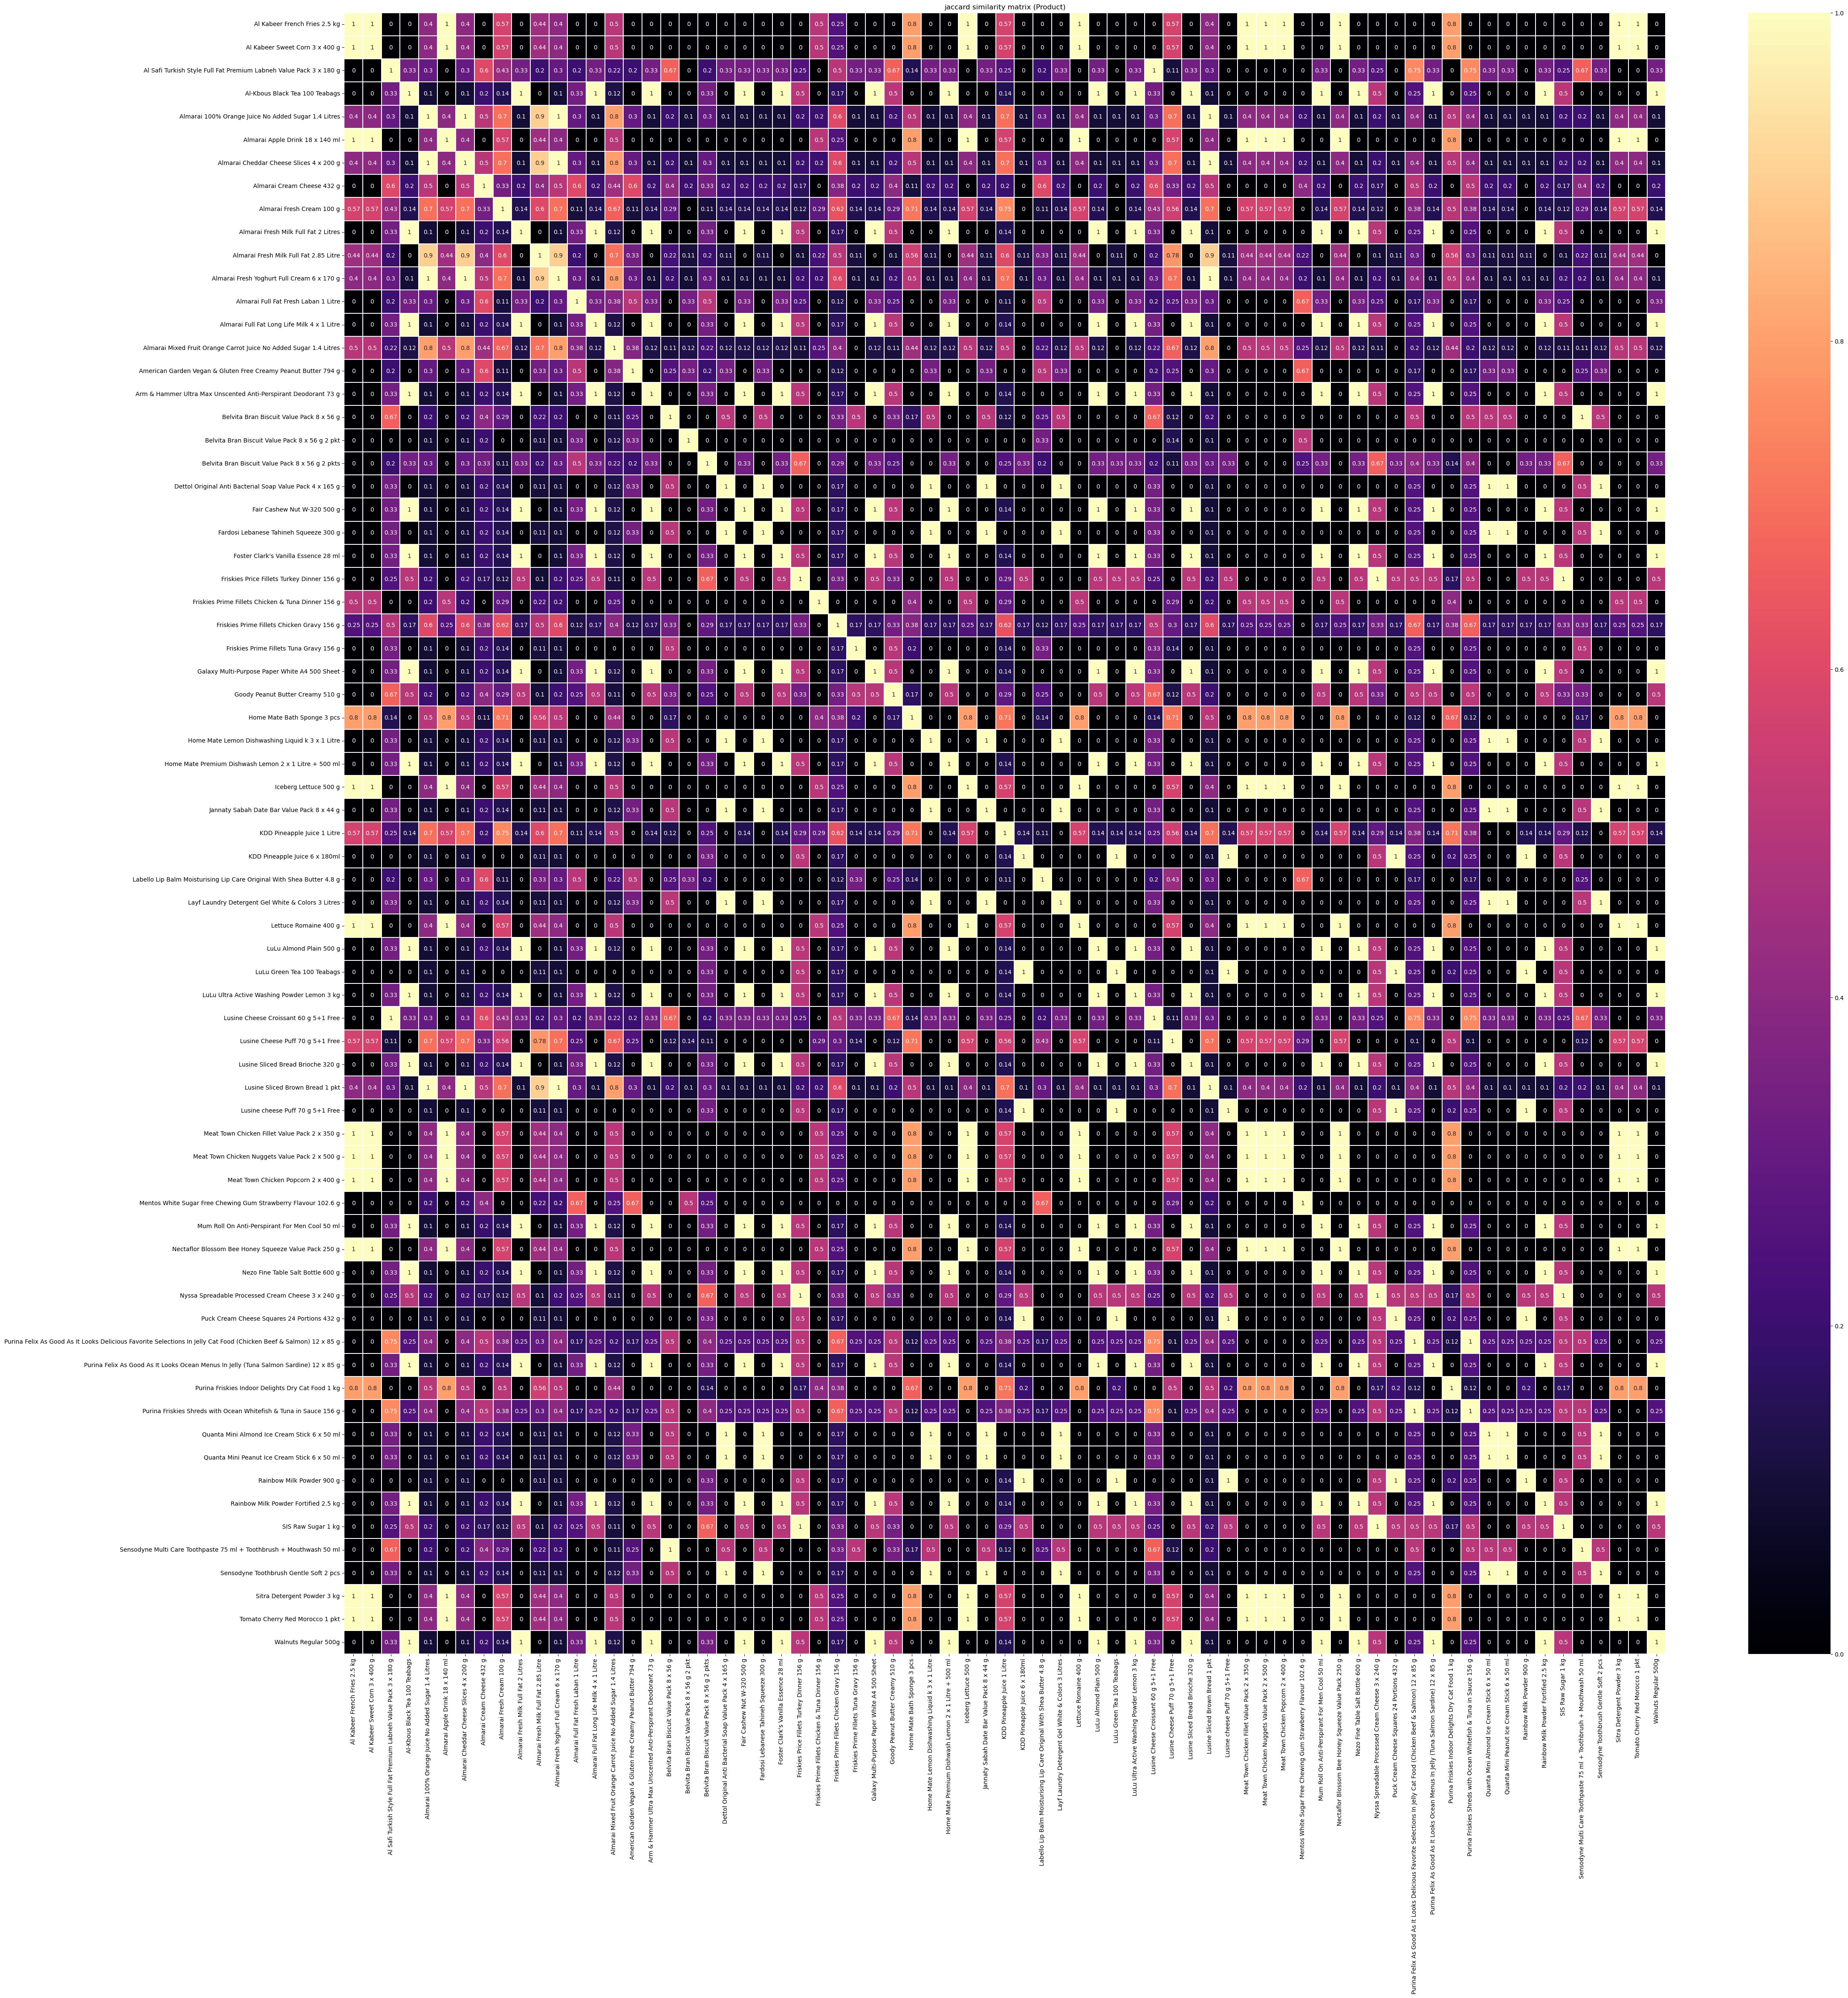

In [58]:
## now we apply Jaccard Similarity to determine how similar product pairs are to one another based on their co occurrence transactions
## business could use this approach to identify which products are frequently purchased together and 
## design a plan to promote products 
from sklearn.metrics import jaccard_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

JMC = pd.DataFrame(
    [[jaccard_score(df_encoded_Product[col1],df_encoded_Product[col2]) for col2 in df_encoded_Product.columns]
     for col1 in df_encoded_Product.columns],
    index=df_encoded_Product.columns,
    columns=df_encoded_Product.columns
)
plt.figure(figsize=(50,50))
sns.heatmap(JMC,annot=True,cmap="magma",linewidths=0.1)
plt.savefig("jaccard_similarity_matrix_71x71.png",dpi=300,bbox_inches="tight")
plt.title("jaccard similarity matrix (Product)")
plt.show()

### horizontal bar for the Most present category in all transaction

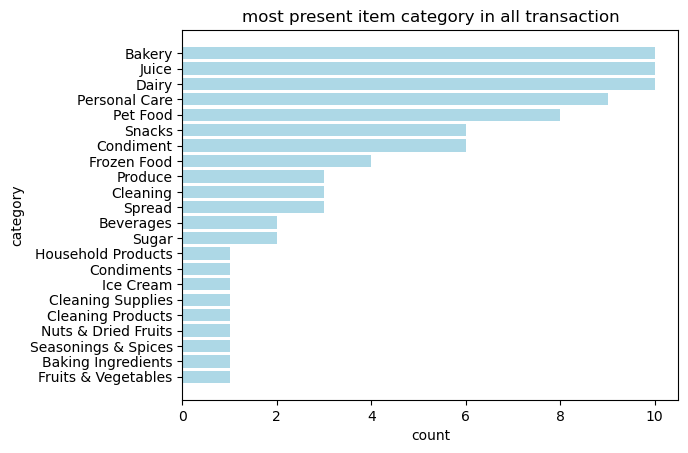

In [60]:
import matplotlib.pyplot as plt
ccf=df_encoded_Category.sum()
ccf=ccf.sort_values(ascending=True)
plt.figure()
plt.barh(ccf.index,ccf.values,color="lightblue")
plt.xlabel("count")
plt.ylabel("category")
plt.title("most present item category in all transaction")
plt.show()